In [2]:
#import libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NFLX.csv')

In [6]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300
6,2015-12-24,118.220001,118.800003,117.300003,117.330002,117.330002,3531300
7,2015-12-28,117.260002,117.349998,113.849998,117.110001,117.110001,8424300
8,2015-12-29,118.190002,119.599998,116.919998,119.120003,119.120003,8159200
9,2015-12-30,118.949997,119.019997,116.430000,116.709999,116.709999,8149700


In [7]:
df.shape

(1007, 7)

In [8]:
#Checking some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [9]:
# Checking for null values
df.isnull().mean()*100

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [15]:
import warnings
warnings.filterwarnings('ignore')

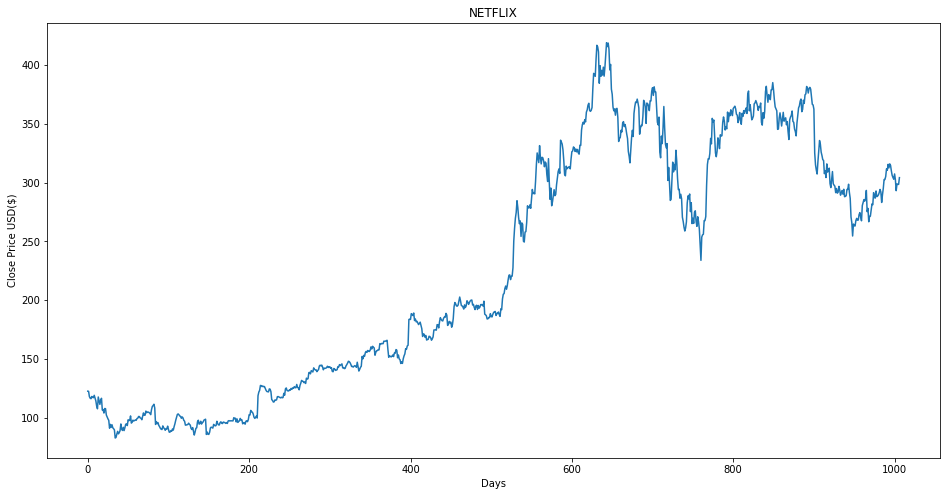

In [11]:
plt.figure(figsize=(16,8))
plt.title('NETFLIX')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

In [12]:
df=df[['Close']]
df.head(4)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997


In [43]:
future_days = 100
df['Prediction']=df[['Close']].shift(-future_days) 
df.tail(4)

,Close,Prediction
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [44]:
X=np.array(df.drop(['Prediction'],1))[: -future_days] #x-axis determined to be the time span 
X

array([[122.639999],
       [122.510002],
       [118.019997],
       [116.629997],
       [116.239998],
       [118.160004],
       [117.330002],
       [117.110001],
       [119.120003],
       [116.709999],
       [114.379997],
       [109.959999],
       [107.660004],
       [117.68    ],
       [114.559998],
       [111.389999],
       [114.970001],
       [116.580002],
       [106.559998],
       [107.059998],
       [104.040001],
       [107.889999],
       [107.739998],
       [102.349998],
       [100.720001],
       [ 99.120003],
       [ 97.830002],
       [ 91.150002],
       [ 94.410004],
       [ 91.839996],
       [ 94.089996],
       [ 91.489998],
       [ 90.739998],
       [ 89.709999],
       [ 82.790001],
       [ 83.32    ],
       [ 86.129997],
       [ 88.449997],
       [ 86.349998],
       [ 87.400002],
       [ 89.050003],
       [ 94.760002],
       [ 90.489998],
       [ 89.230003],
       [ 91.93    ],
       [ 89.120003],
       [ 91.610001],
       [ 94.5

In [45]:
y=np.array(df['Prediction'])[:-future_days] #y axis closing price
y

array([ 90.019997,  87.739998,  87.879997,  89.120003,  88.629997,
        90.5     ,  89.550003,  92.489998,  94.889999,  97.889999,
       100.199997, 102.809998, 103.300003, 102.57    , 101.510002,
       101.25    ,  99.589996, 100.739998,  99.889999,  97.860001,
        97.089996,  93.75    ,  93.849998,  94.120003,  94.290001,
        95.440002,  94.449997,  93.800003,  90.989998,  90.010002,
        91.660004,  88.440002,  85.330002,  87.970001,  91.059998,
        91.480003,  96.669998,  97.910004,  94.599998,  95.099998,
        97.059998,  94.669998,  95.970001,  96.43    ,  98.019997,
        98.389999,  98.809998,  85.839996,  87.910004,  85.989998,
        85.889999,  87.660004,  91.410004,  92.040001,  91.650002,
        91.25    ,  94.370003,  93.559998,  93.099998,  93.440002,
        97.029999,  95.110001,  93.989998,  93.93    ,  95.889999,
        96.589996,  95.309998,  95.120003,  96.370003,  96.160004,
        95.870003,  95.260002,  95.940002,  95.18    ,  97.32 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [48]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [49]:
tree =DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)
svr = SVR().fit(x_train,y_train)
rfr = RandomForestRegressor().fit(x_train,y_train)

In [50]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[354.299988],
       [359.609985],
       [352.600006],
       [349.600006],
       [358.859985],
       [356.269989],
       [361.209991],
       [358.820007],
       [361.459991],
       [363.440002],
       [358.779999],
       [375.220001],
       [377.869995],
       [361.01001 ],
       [366.230011],
       [359.970001],
       [353.369995],
       [354.609985],
       [356.559998],
       [366.959991],
       [367.720001],
       [369.75    ],
       [367.880005],
       [365.48999 ],
       [361.410004],
       [364.709991],
       [363.920013],
       [367.649994],
       [351.140015],
       [348.869995],
       [359.459991],
       [354.73999 ],
       [360.350006],
       [377.339996],
       [381.890015],
       [374.230011],
       [368.329987],
       [374.850006],
       [371.829987],
       [370.540009],
       [378.809998],
       [379.059998],
       [385.029999],
       [378.670013],
       [370.459991],
       [364.369995],
       [362.75    ],
       [361.0

In [51]:
lr_prediction = lr.predict(x_future)
lr_prediction 

array([343.83370996, 347.87105368, 342.54116466, 340.26017821,
       347.30080707, 345.33155848, 349.08758435, 347.27041064,
       349.27766655, 350.78312597, 347.23999141, 359.73979864,
       361.75466544, 348.93553303, 352.9044502 , 348.14478422,
       343.12660948, 344.06940961, 345.55206068, 353.45947503,
       354.03733253, 355.58079927, 354.15898818, 352.34179091,
       349.23965999, 351.7487352 , 351.14809216, 353.98410419,
       341.43109143, 339.70512981, 347.75700892, 344.16825615,
       348.43371297, 361.35169193, 364.81120248, 358.98708072,
       354.50112246, 359.45848078, 357.16227332, 356.18146587,
       362.46937681, 362.65945901, 367.19862279, 362.36294218,
       356.12062588, 351.49022644, 350.25849756, 348.95834213,
       336.9603542 , 337.22645028, 344.35833836, 347.64296492,
       343.94777753, 339.12727231, 343.81090085, 347.96231291,
       342.24462501, 343.90216008, 344.41156746, 339.94844036,
       341.97091805, 335.45489478, 330.39871273, 343.14

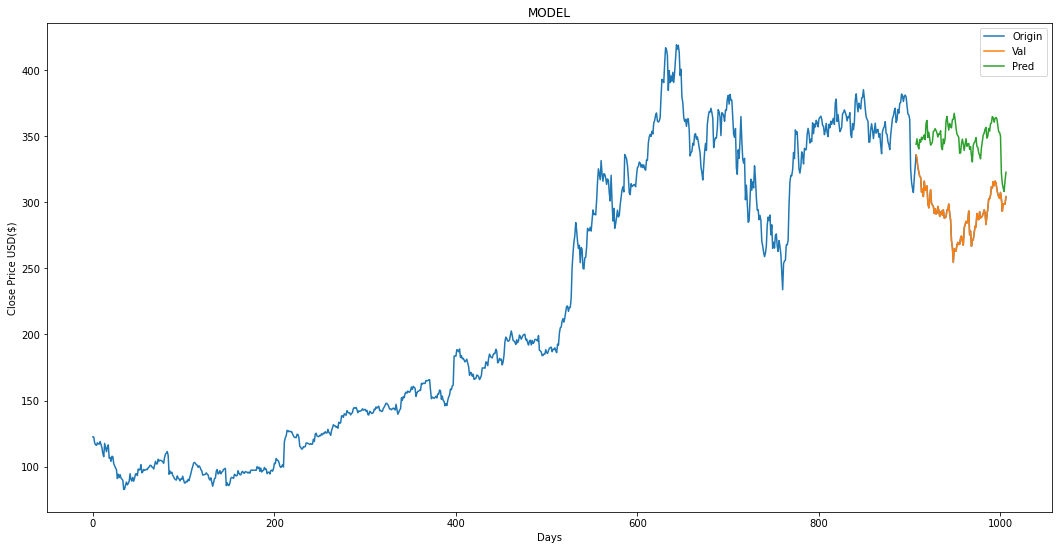

In [52]:
predictions = lr_prediction
valid =df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(18,9))
plt.title('MODEL')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Origin','Val','Pred'])
plt.show()

In [53]:
tree_prediction = tree.predict(x_future)
tree_prediction

array([282.929993 , 332.700012 , 325.929993 , 322.98999  , 319.5      ,
       297.809998 , 307.630005 , 324.600006 , 304.290009 , 315.899994 ,
       308.929993 , 310.829987 , 362.869995 , 299.109985 , 295.76001  ,
       376.160004 , 309.380005 , 298.98999  , 297.809998 , 351.769989 ,
       291.440002 , 294.980011 , 291.029999 , 291.769989 , 296.779999 ,
       358.820007 , 289.290009 , 325.744995 , 293.25     , 339.850006 ,
       294.339996 , 287.98999  , 288.269989 , 362.869995 , 294.149994 ,
       294.290009 , 298.600006 , 291.559998 , 283.109985 , 270.75     ,
       265.920013 , 254.589996 , 264.75     , 263.309998 , 263.079987 ,
       267.619995 , 269.579987 , 268.029999 , 268.149994 , 286.809998 ,
       274.459991 , 270.720001 , 267.529999 , 280.480011 , 282.929993 ,
       285.529999 , 284.25     , 267.529999 , 293.350006 , 275.299988 ,
       278.049988 , 292.859985 , 271.269989 , 271.5      , 359.609985 ,
       281.859985 , 281.209991 , 291.450012 , 287.410004 , 286.8

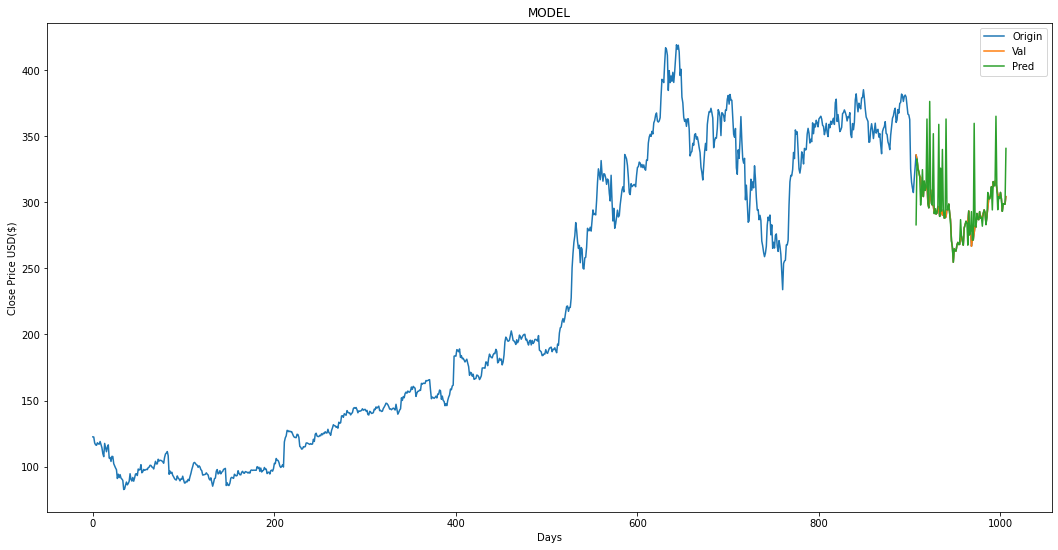

In [54]:
predictions = tree_prediction
valid =df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(18,9))
plt.title('MODEL')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Origin','Val','Pred'])
plt.show()

In [55]:
svr_prediction = svr.predict(x_future)
svr_prediction 

array([311.57388797, 307.85684985, 312.76278408, 314.85448351,
       308.38142958, 310.19463575, 306.73908148, 308.40940054,
       306.56463466, 305.18549288, 308.43739329, 297.13858438,
       295.38260744, 306.87866939, 303.25171345, 307.60516651,
       312.22451072, 311.35692147, 309.99154699, 302.74802656,
       302.22475963, 300.83337055, 302.11475204, 303.76335466,
       306.59950996, 304.30367644, 304.85191408, 302.27290884,
       313.7820175 , 315.36168936, 307.96173471, 311.26592015,
       307.33961158, 295.73182814, 292.76854663, 297.80066512,
       301.80567572, 297.38565684, 299.41830933, 300.29457083,
       294.76576922, 294.60227424, 290.77289633, 294.85741977,
       300.34907187, 304.539512  , 305.66555769, 306.8577275 ,
       317.85521737, 317.61472454, 311.09090842, 308.06663298,
       311.46889122, 315.88880394, 311.5948821 , 307.77293103,
       313.03525409, 311.51088224, 311.04189614, 315.13945384,
       313.28662443, 319.20976107, 323.66252672, 312.20

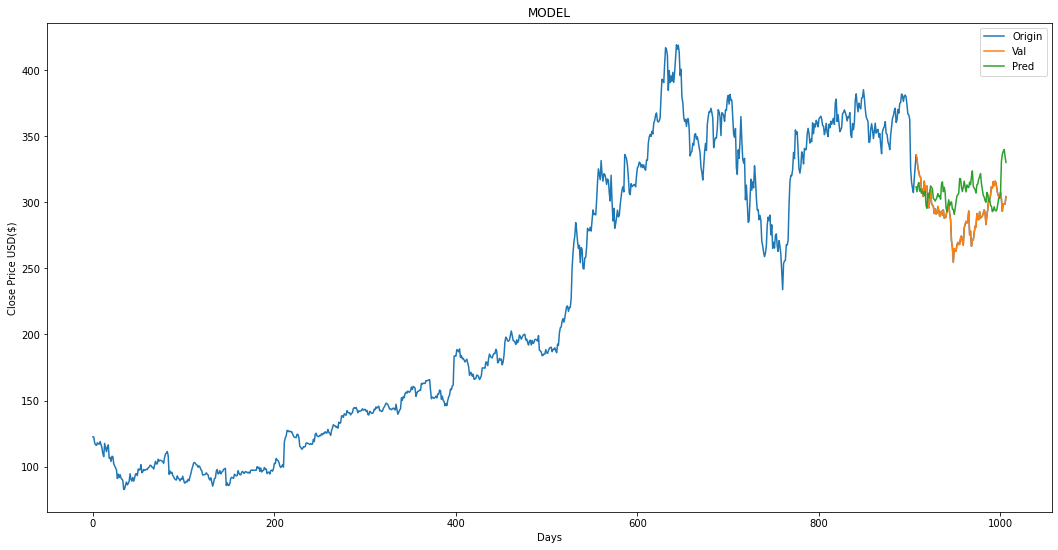

In [56]:
predictions = svr_prediction
valid =df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(18,9))
plt.title('MODEL')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Origin','Val','Pred'])
plt.show()

In [57]:
rfr_prediction = rfr.predict(x_future)
rfr_prediction

array([281.12489435, 313.82440633, 316.96849658, 326.44239108,
       320.83613506, 327.47399975, 298.70410379, 323.62663836,
       303.03990576, 310.85909728, 314.4399315 , 301.02199452,
       329.48579738, 291.34638926, 298.40730475, 362.6684041 ,
       306.74610245, 307.2124944 , 324.381097  , 333.81719564,
       304.41306382, 312.61691059, 294.62254979, 293.38179021,
       295.78699904, 347.81680613, 303.95120314, 323.48162177,
       300.2432986 , 334.66140104, 293.73619846, 306.29529623,
       295.8429933 , 341.32379472, 315.95816216, 295.69940714,
       301.36490255, 294.96130071, 299.34148759, 276.49299511,
       265.84970804, 260.2191007 , 275.95740235, 264.77960189,
       272.16279199, 276.41579938, 274.65103833, 275.1596989 ,
       281.78729513, 312.02129609, 281.37319488, 282.39860086,
       277.38049633, 299.00250733, 281.12489435, 307.01110297,
       309.44320157, 274.81089681, 289.30700118, 295.34099044,
       303.73119249, 286.88969547, 287.32029054, 290.45

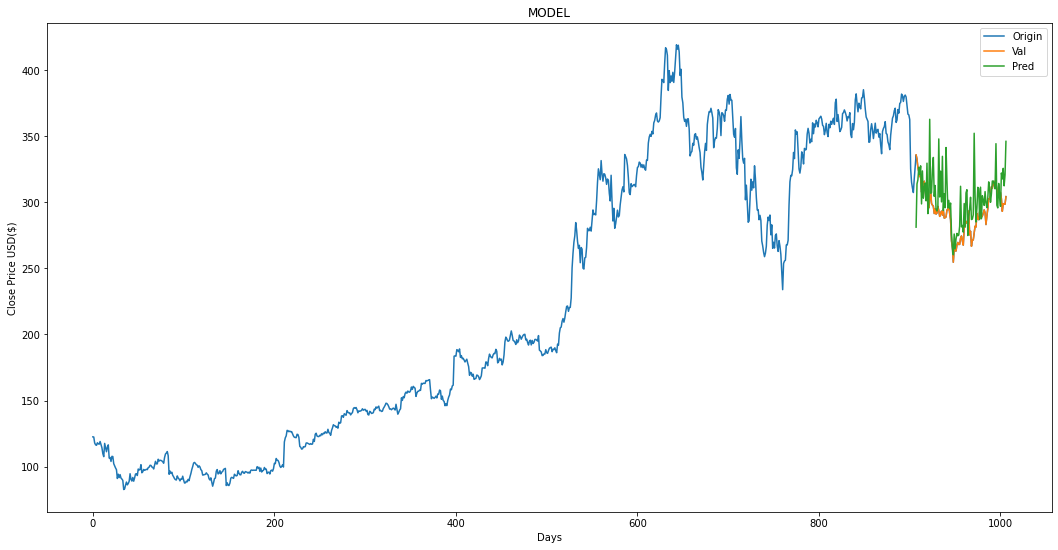

In [58]:
predictions = rfr_prediction
valid =df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(18,9))
plt.title('MODEL')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Origin','Val','Pred'])
plt.show()